## Seasonal Champagne Sales Prediction Using SARIMAX

In [1]:
from pyforest import *

from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/ASUS/kode/Projek/latihan_timeseries/perrin-freres-monthly-champagne-.csv')
df.head(5)

<IPython.core.display.Javascript object>

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [85]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


### Cleaning Data

In [4]:
df['Month'].unique()

array(['1964-01', '1964-02', '1964-03', '1964-04', '1964-05', '1964-06',
       '1964-07', '1964-08', '1964-09', '1964-10', '1964-11', '1964-12',
       '1965-01', '1965-02', '1965-03', '1965-04', '1965-05', '1965-06',
       '1965-07', '1965-08', '1965-09', '1965-10', '1965-11', '1965-12',
       '1966-01', '1966-02', '1966-03', '1966-04', '1966-05', '1966-06',
       '1966-07', '1966-08', '1966-09', '1966-10', '1966-11', '1966-12',
       '1967-01', '1967-02', '1967-03', '1967-04', '1967-05', '1967-06',
       '1967-07', '1967-08', '1967-09', '1967-10', '1967-11', '1967-12',
       '1968-01', '1968-02', '1968-03', '1968-04', '1968-05', '1968-06',
       '1968-07', '1968-08', '1968-09', '1968-10', '1968-11', '1968-12',
       '1969-01', '1969-02', '1969-03', '1969-04', '1969-05', '1969-06',
       '1969-07', '1969-08', '1969-09', '1969-10', '1969-11', '1969-12',
       '1970-01', '1970-02', '1970-03', '1970-04', '1970-05', '1970-06',
       '1970-07', '1970-08', '1970-09', '1970-10', 

In [5]:
df.drop(106, axis=0, inplace=True)
df.drop(105, axis=0, inplace=True)

In [6]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
# ganti tipe data ke datetime
df['Month'] = pd.to_datetime(df['Month'])
df

<IPython.core.display.Javascript object>

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Month                                                   105 non-null    datetime64[ns]
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [9]:
data = df.copy()

In [13]:
data

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


#### Bikin indeks sebagai waktu

In [14]:
data.set_index('Month', inplace=True)

In [15]:
data

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [16]:
data.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [19]:
data['Sales'] = data['Perrin Freres monthly champagne sales millions ?64-?72']

In [27]:
data = data.drop(columns=['Perrin Freres monthly champagne sales millions ?64-?72'])

In [28]:
data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


### EDA

<Axes: xlabel='Month'>

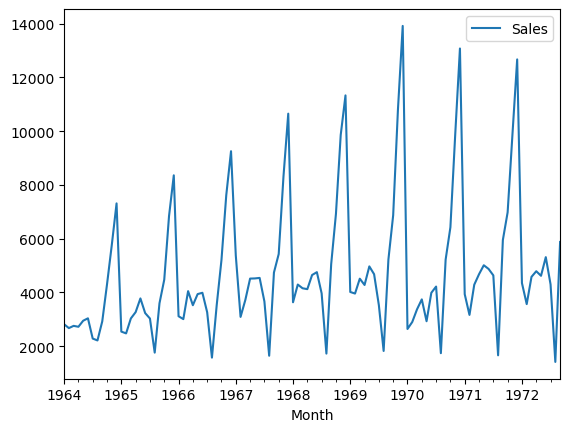

In [29]:
data.plot()

Berdasarkan grafik tersebut terdapat kenaikan pada periode tertentu sehingga data tersebut merupakan data seasonal. Selanjutnya kita akan membuktikan apakah data tersebut data stasioner atau tidak

### Stationarity Checking
#### Merupakan data tidak stasioner (sifat statistiknya tidak berubah secara signifikan dari waktu ke waktu)
stasioneritas merupakan sifat di mana statistik dasar deret waktu seperti rata-rata dan varians tidak berubah secara signifikan dari waktu ke waktu.


Dikarenakan time series. Jika pada variabel target kita diplot, dan ternyata harganya itu seperti mengalami kenaikan pada suatu waktu tertentu artinya ada semacam Season atau Musim dimana harga naik. Maka dari itu kita perlu terapin feature engineering untuk mengetahui lebih dalam mengenai musim tersebut.

In [30]:
from statsmodels.tsa.stattools import adfuller

hasil_uji_stasioner = adfuller(data['Sales'])

fungsi adfuller tersebut akan memberikan 5 nilai parameter yaitu ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'].

- yang kita cek atau utamain itu adalah parameter dari 'p-value'
- kalau 'p-value' < 0.005, itu cukup bagus dan data merupakan stasioner
- ADF itu cara uji statistik yang digunakan untuk menentukan apakah suatu deret waktu memiliki akar satuan (unit root), yang menunjukkan bahwa deret waktu tersebut tidak stasioner

In [33]:
# fungsi untuk mencari ADF dan 'p-value'

def uji_adfuler(sales):
    hasil = adfuller(sales)
    
    label = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value, labels in zip(hasil, label):
        print(labels+' : '+str(value))
        
    if hasil[1] <= 0.05: #p value kita
        print("bukti cukup kuat terhadap hipotesis nol (Ho), maka kita tolak hipotesis nol. Data tidak memiliki unit root dan stasioner")
    else:
        print("bukti cukup lemah terhadap hipotesis nol, deret waktu memiliki unit root, mengindikasikan tidak stasioner")

In [35]:
uji_adfuler(data['Sales'])

ADF Test Statistic : -1.833593056327635
p-value : 0.36391577166023914
#Lags Used : 11
Number of Observations Used : 93
bukti cukup lemah terhadap hipotesis nol, deret waktu memiliki unit root, mengindikasikan tidak stasioner


ternyata data 'sales' kita dengan nilai 'p_value' itu tidak memenuhi kondisi data yang statisioner. Sehingga kita harus mengubah data 'sales' tersebut menjadi keadaan statisioner


### Making Time Series Data

#### lagging feature
adalah nilai-nilai dari suatu variabel yang diambil pada waktu sebelumnya dalam rentang waktu tertentu. Tujuannya untuk menangkap pola atau tren dalam data yang bergantung pada nilai-nilai masa lalu.

### Pemrosesan data yang tidak statisioner

#### Rolling & Shifting / Differencing

Differencing (shifting) adalah teknik atau metode untuk membuat data menjadi stasioner

Sedangkan Rolling pada dasarnya digunakan untuk menghaluskan deret Waktu di mana kita dapat menggunakan berbagai teknik seperti moving average, moving median atau beberapa pendekatan berbeda tergantung pada data yang kita miliki.

Rolling sama seperti window bergulir 5 hari, window bergulir 6 hari, window bergulir 7 hari dan dapat dikatakan bahwa itu adalah window yang telah kita pertimbangkan untuk Moving average / median

Fitur-fitur hasil perulangan menggunakan rolling mean dan std tersebut itu akan sangat membantu dalam prediki target kita nantinya yaitu 'Rata-rata harga saham berdasarkan volume perdagangan' terhadap setiap harinya. Dikarenakan sudah mengubah datanya menjadi Stasioner dan siap. Artinya fitur tersebut menjadi variabel independent

In [36]:
data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [37]:
data['Sales'].shift(1) #menjadi series

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

shift(1), kita mengurangkan setiap nilai dalam time series dengan nilai pada titik waktu sebelumnya (lag 1).

In [38]:
data['Perbedaan Bulan Pertama'] = data['Sales'] - data['Sales'].shift(1) #satu bulan

In [39]:
# seasonal
data['Perbedaan Tahun Sebelumnya'] = data['Sales'] - data['Sales'].shift(12) #satu tahun

In [40]:
data

,Sales,Perbedaan Bulan Pertama,Perbedaan Tahun Sebelumnya
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [42]:
# kita coba uji statisioner
uji_adfuler(data['Perbedaan Bulan Pertama'].dropna())

ADF Test Statistic : -7.189896448051003
p-value : 2.5196204473870433e-10
#Lags Used : 11
Number of Observations Used : 92
bukti cukup kuat terhadap hipotesis nol (Ho), maka kita tolak hipotesis nol. Data tidak memiliki unit root dan stasioner


In [43]:
uji_adfuler(data['Perbedaan Tahun Sebelumnya'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
bukti cukup kuat terhadap hipotesis nol (Ho), maka kita tolak hipotesis nol. Data tidak memiliki unit root dan stasioner


setelah dilakukan proses differencing ternyata hasil tes melalui nilai 'p-value' itu yaitu 2  kali sepuluh pangkat -10, yaitu lebih kecil dari 0.005. Sehingga data tersebut sudah statisioner

<Axes: xlabel='Month'>

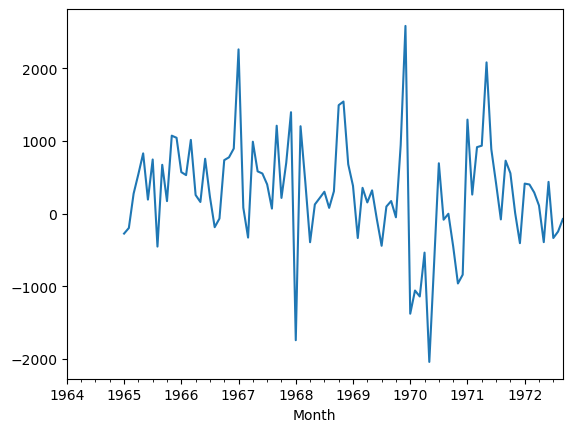

In [45]:
# kita coba plot lagi
data['Perbedaan Tahun Sebelumnya'].plot()

## Arima Modelling
AR + I + MA

ARIMA --> (P, d, q)

AR	= Auto Regressive Model:
AR ini nantinya akan menghasilkan nilai dari P.
Untuk mencari P itu kita akan menggunakan PACF. PACF adalah Partial Auto Correlation Factor.

I	= Integrity / Diferencing:
I ini nantinya akan menghasilkan nilai dari d.
Untuk mencari D itu menggunakan konsep Differencing kita bisa mencari nilai d.

MA	= Moving Average:
MA ini nantinya akan menghasilkan nilai dari q.
Lalu untuk mencari nilai q itu kita bisa menggunakan konsep ACF atau Auto correlation Factor. 

Residual = Error

#### Plot ACF dan PACF
Untuk mencari nilai AR, I, dan MA atau (P, d, q)

<IPython.core.display.Javascript object>

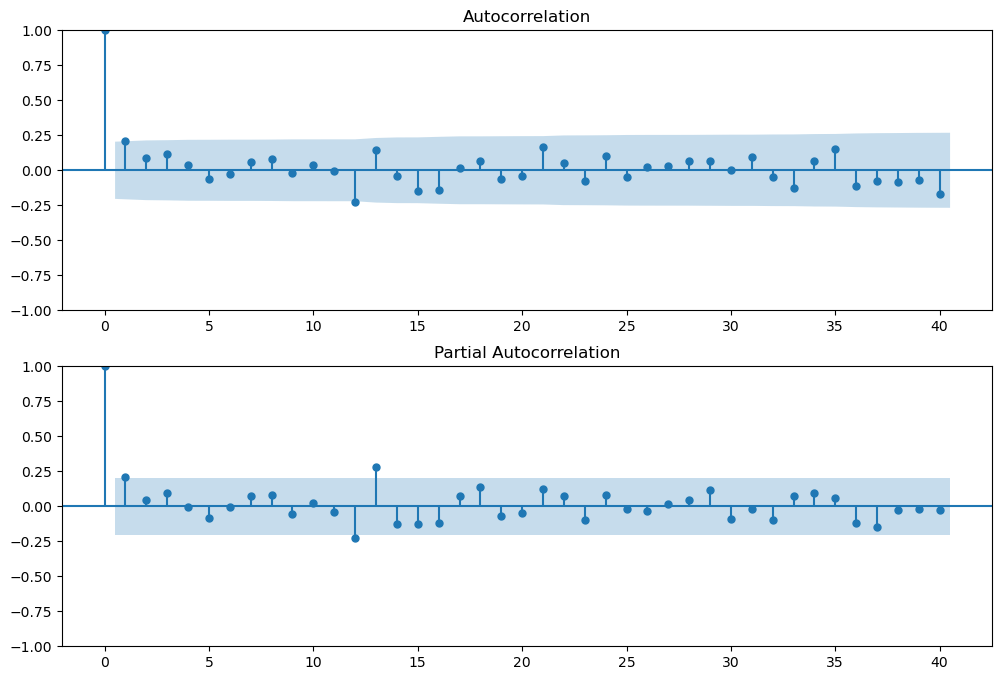

In [46]:
# viz dengan menggunakan Autocorrelation(plot_acf) dan Partial Autocorrelation(plot_pacf)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Perbedaan Tahun Sebelumnya'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Perbedaan Tahun Sebelumnya'].iloc[13:],lags=40,ax=ax2)

Berdasarkan hasil analisis acf untuk mencari MA (q) dan pacf untuk mencari AR (p). Kita bisa coba nilai dari p = 1 dan q = 1, hal ini dikarenakan aku masih belum yakin berapa nilai yang tepat karena pada lag pertama itu sudah turun sampai ke boundarynya

In [47]:
model = ARIMA(data['Sales'], order=(1,1,1))

In [48]:
model_fit = model.fit()

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 05 May 2024   AIC                           1911.627
Time:                        21:43:12   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

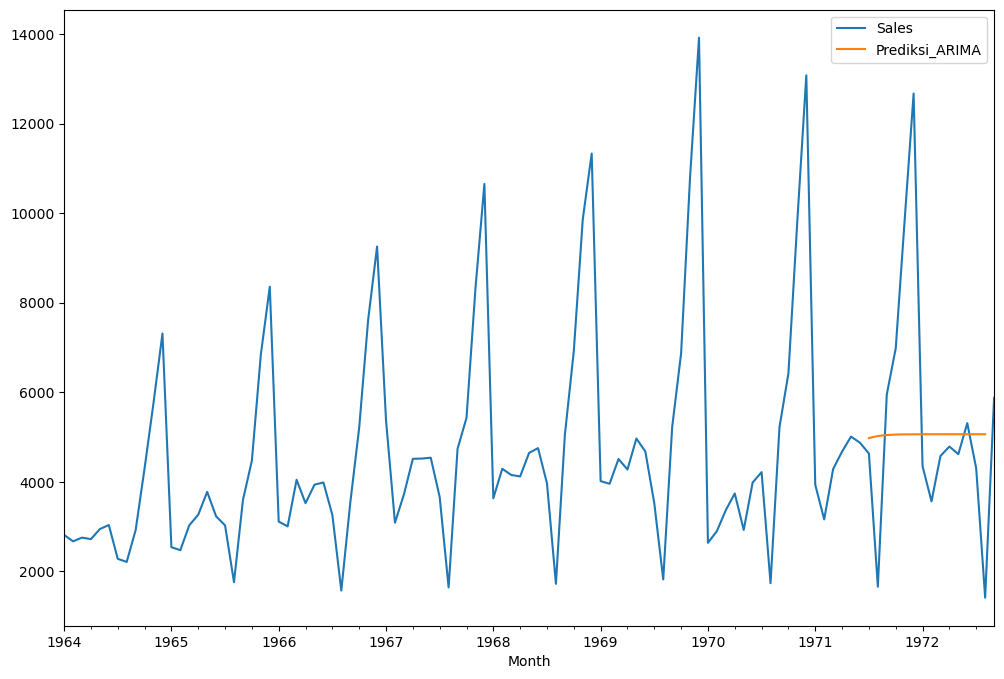

In [51]:
data['Prediksi_ARIMA'] = model_fit.predict(start=90, end=103, dynamic=True)
data[['Sales', 'Prediksi_ARIMA']].plot(figsize=(12,8))

kita bisa lihat, apa yang terjadi jika kita tidak mengubah data menjadi seasonal dan statisioner. Ternyata sepertinya data seasonal ini tidak cocok untuk algoritma ARIMA. Mungkin algoritma ARIMA ini bagus untuk bekerja dengan data yang tidak seasonal atau data seperti hari-hari. 

### SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors)
 untuk menangani data dengan pola musiman dan variabel-variabel eksogen (regresor).
 
- tsa = time series analisis
- statespace = pendekatan untuk menganalisis data time series yang melibatkan model yang terdiri dari dua bagian: state space model dan observasi model

In [53]:
#                                                                              #p, d, q, shift_value
model_x = sm.tsa.statespace.SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
hasil_x = model_x.fit()

In [54]:
# prediksi
data['Prediksi_SARIMAX'] = hasil_x.predict(start=90, end=103, dynamic=True)

<Axes: xlabel='Month'>

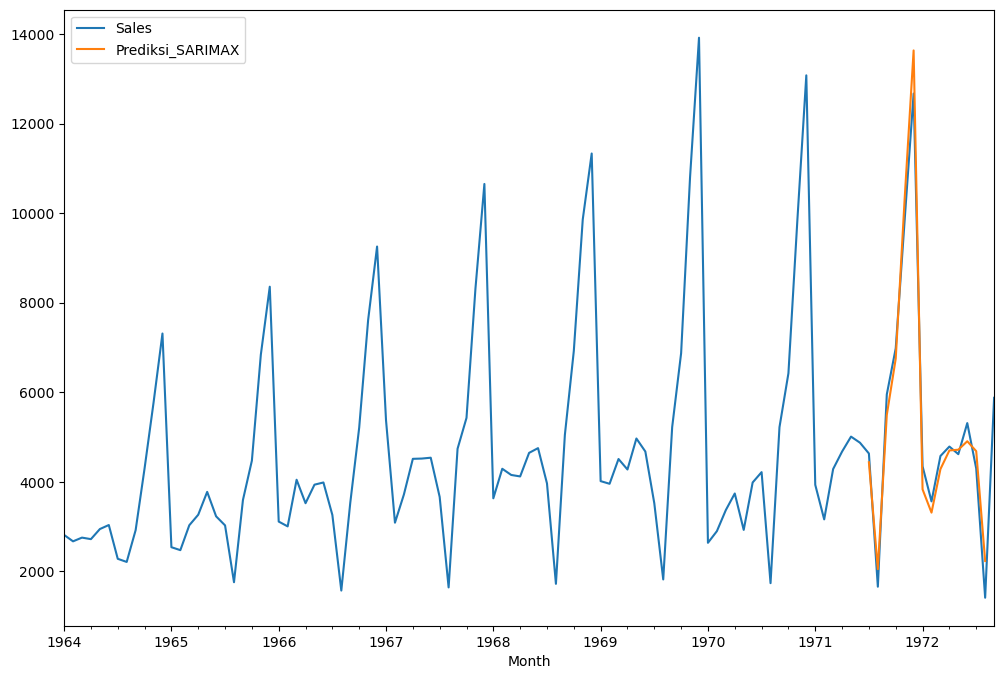

In [55]:
# plot predict
data[['Sales', 'Prediksi_SARIMAX']].plot(figsize=(12,8))

Berdasarkan hasil forecast atau prediksi terhadap data yang sudah ada. Maka dapat dibuktikan bahwa data statisioner dan seasonal tersebut sudah berhasil dengan diterapkannya algoritma yang cocok yaitu SARIMAX

### Prediksi Masa Depan

In [56]:
from pandas.tseries.offsets import DateOffset

melakukan operasi-offset pada objek tanggal dan waktu di Pandas, seperti menambah atau mengurangi hari, bulan, tahun, atau rentang waktu lainnya.

In [57]:
# waktu terakhir, jadi mau prediksi waktu setelahnya
data.index[-1]

Timestamp('1972-09-01 00:00:00')

In [60]:
tanggal_forecast = [data.index [-1] + DateOffset(months=x) for x in range (0,36)] # dua tahun yaitu 24 bulan

In [64]:
tanggal_forecast

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-

In [65]:
# kita masukin ke dataset

tanggal_forecast_df = pd.DataFrame(index=tanggal_forecast[1:], columns=data.columns)

<IPython.core.display.Javascript object>

In [66]:
tanggal_forecast_df

,Sales,Perbedaan Bulan Pertama,Perbedaan Tahun Sebelumnya,Prediksi_ARIMA,Prediksi_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [67]:
# setelah bikin dataframe untuk predikisinya, kita gabungin ke data kita
forecast_df = pd.concat([data, tanggal_forecast_df])

<IPython.core.display.Javascript object>

In [75]:
forecast_df.iloc[105:].shape[0]

35

In [82]:
forecast_df['Ramalan'] = hasil_x.predict(start=104, end=139, dynamic=True)

<Axes: >

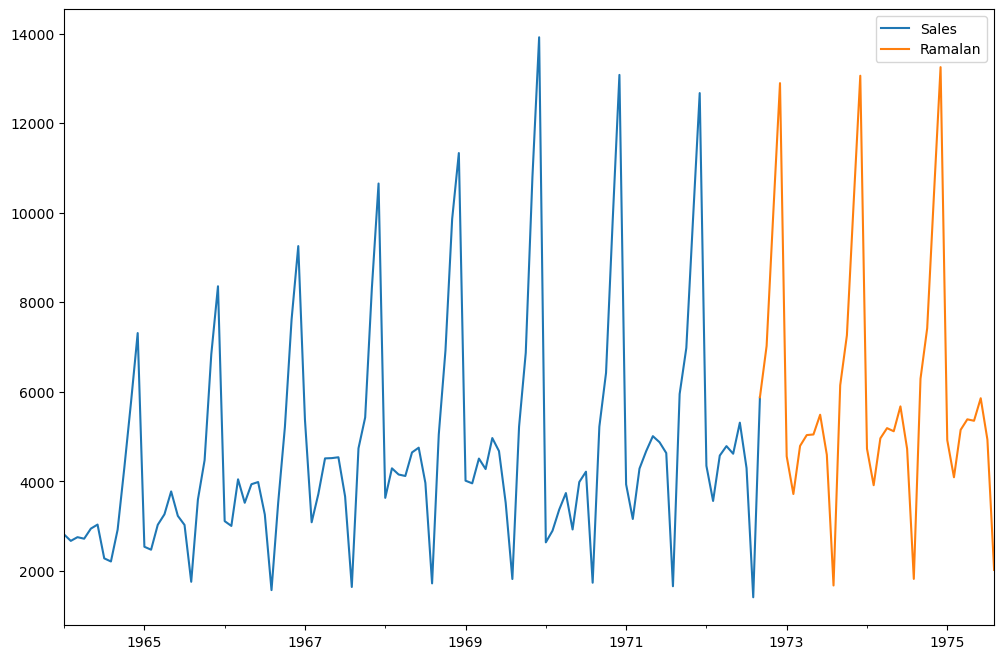

In [83]:
# plot the forecast mulai dari indeks 104 ke 139 (3 tahun)
forecast_df[['Sales', 'Ramalan']].plot(figsize=(12,8))

Sehingga berdasarkan hasil ramalan terhadap data seasonal tersebut per tahunnya. Diketahui bahwa penjualan dari produk Champagne pada perusahaan Perrin Freres itu cukup konstan atau tidak ada perbedaan besar yang terjadi. Namun terdapat sedikit kenaikan penjualan dalam 3 tahun kedepan.

### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.sqrt(mean_squared_error(data['Sales'],data['Prediksi_SARIMAX']))

In [ ]:
mean_absolute_error(data['Sales'],data['Prediksi_SARIMAX'])

### Deployment

In [90]:
import pickle

rute = 'C:/Users/ASUS/kode/projek/latihan_timeseries/Sales_Prediction_SARIMAX.pkl'
with open(rute, 'wb') as files:
    pickle.dump(model,files)